In [1]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [2]:
bp_file = '/mnt/volume1/T2D/EMR-data/FamilyHist.csv'
bp_file_p = '/mnt/volume1/T2D/EMR-data2/FamilyHist.csv'

In [3]:
data_pd = pd.read_csv(bp_file, sep='|')


In [4]:
data_pd.shape

(3585, 2)

In [5]:
data_pd.head()

,Deidentified_Pat_ID,Family History
0,MGVNDNAK,Diabetes
1,MNADDANN,Diabetes Type 1
2,MNADZOHA,Diabetes
3,MNANKNAN,Diabetes Type 1
4,MNANKNAN,Diabetes Type 2


In [6]:
pd.Series(data_pd["Family History"].tolist()).sort_values().unique()

array(['Diabetes', 'Diabetes Type 1', 'Diabetes Type 2',
       'Gestational Diabetes'], dtype=object)

In [7]:
len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

3222

In [8]:
def diabetes_type(x):
    if x == 'Diabetes Type 1':
        return 1
    elif x == 'Diabetes Type 2':
        return 2
    elif x == 'Diabetes':
        return 3
    elif x == 'Gestational Diabetes':
        print(x)
        return 4
    else:
        print(x)
        return 0

In [9]:
result_col = 'Family History'
data_pd['type'] = data_pd[result_col].apply(lambda x: diabetes_type(x))

Gestational Diabetes
Gestational Diabetes
Gestational Diabetes
Gestational Diabetes
Gestational Diabetes


In [10]:
data_pd.head()

,Deidentified_Pat_ID,Family History,type
0,MGVNDNAK,Diabetes,3
1,MNADDANN,Diabetes Type 1,1
2,MNADZOHA,Diabetes,3
3,MNANKNAN,Diabetes Type 1,1
4,MNANKNAN,Diabetes Type 2,2


In [11]:
data_pd.sort_values(['Deidentified_Pat_ID','type'], inplace=True)

In [12]:
data_pd.drop_duplicates(['Deidentified_Pat_ID'], keep='last', inplace=True)

In [13]:
len(data_pd[data_pd['type'] == 5])


0

In [14]:
data_pd.shape

(3222, 3)

In [15]:
data_pd.to_csv(bp_file_p, index=False)

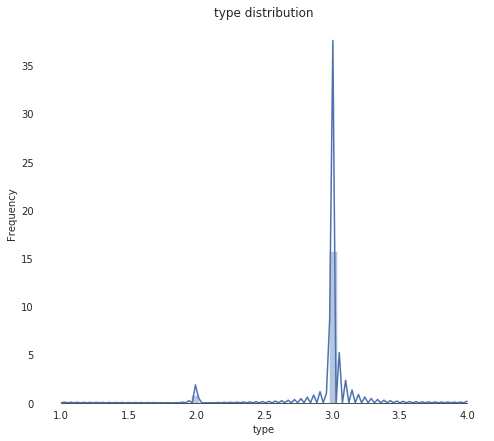

In [16]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_pd['type'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="type")
ax.set(title="type distribution")
sns.despine(trim=True, left=True)
plt.show()